In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyuvdata
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA/beam_manipulation")
import jones

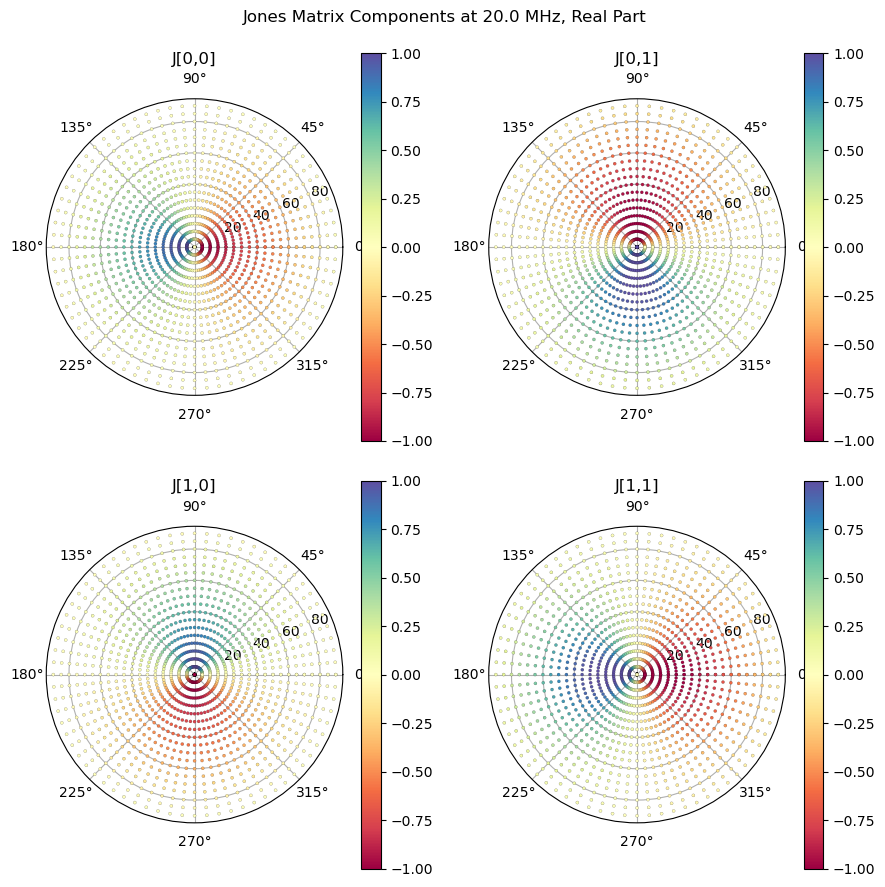

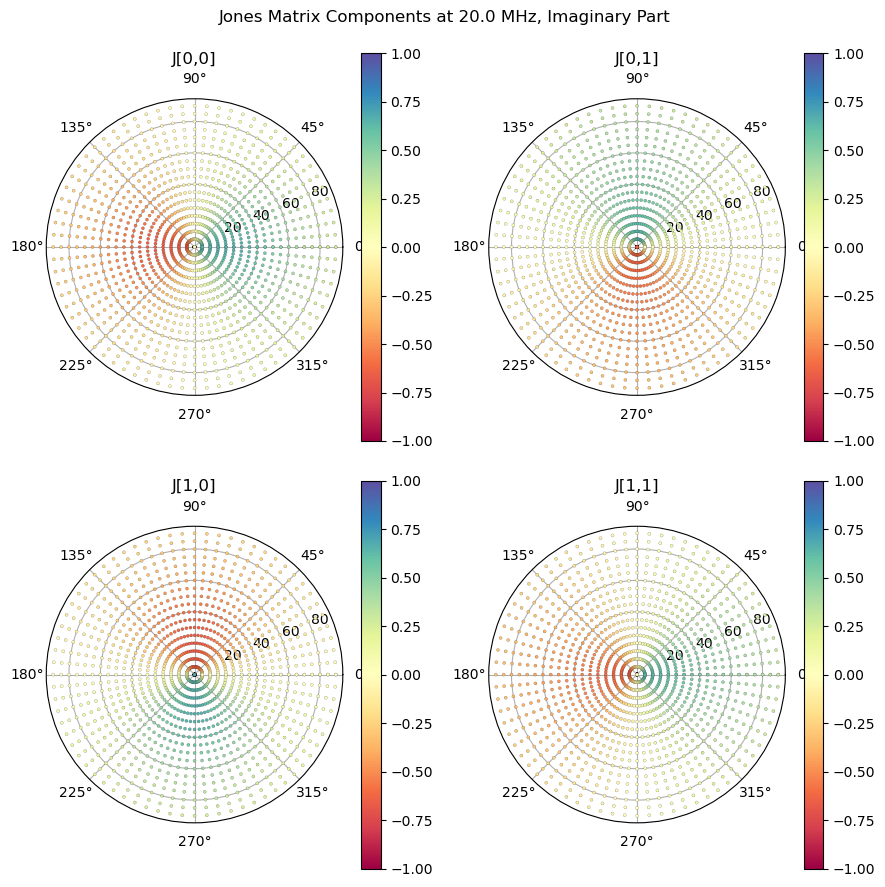

In [2]:
# Read beam simulation generated by David Woody, from Marin Anderson
beam = jones_to_mueller.read_beam_txt_file('/Users/ruby/Astro/LWA_beams/DW_beamquadranttable20151110.txt', header_line=6)
jones_to_mueller.plot_beam(beam, contour_plot=False, plot_freq=20.)
jones_to_mueller.plot_beam(beam, contour_plot=False, real_part=False, plot_freq=20.)

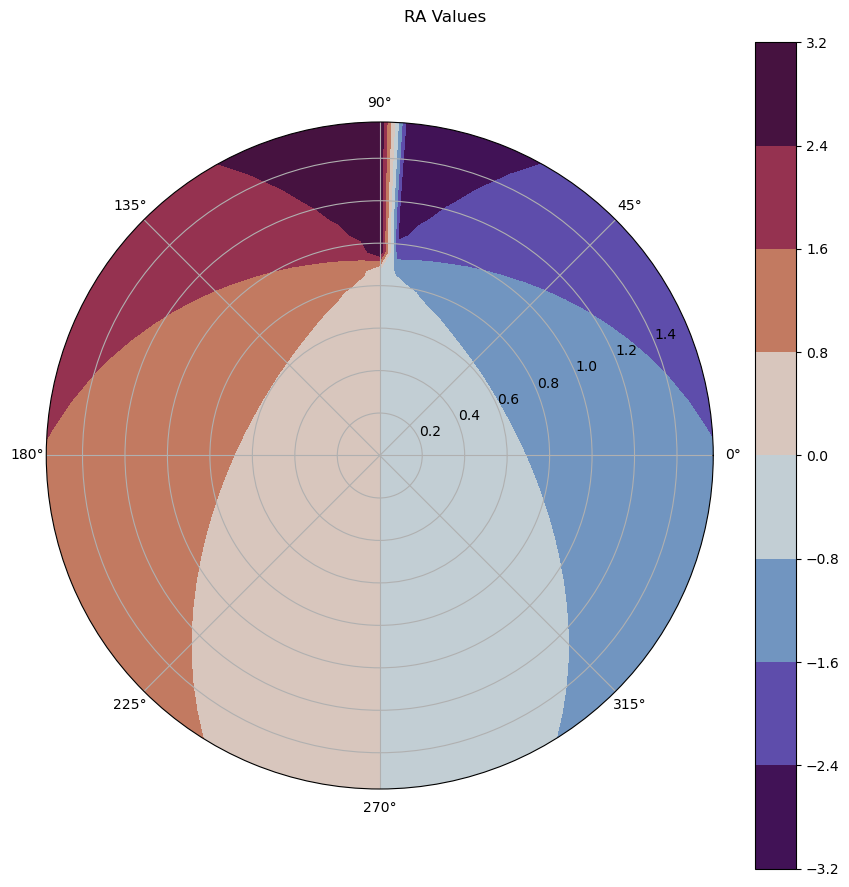

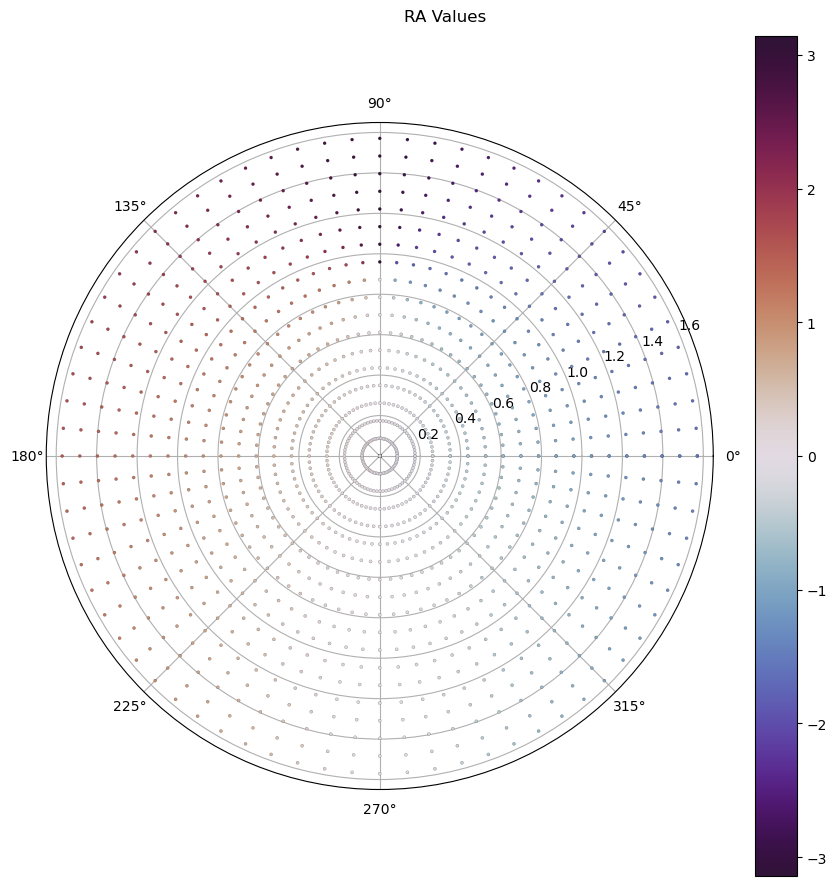

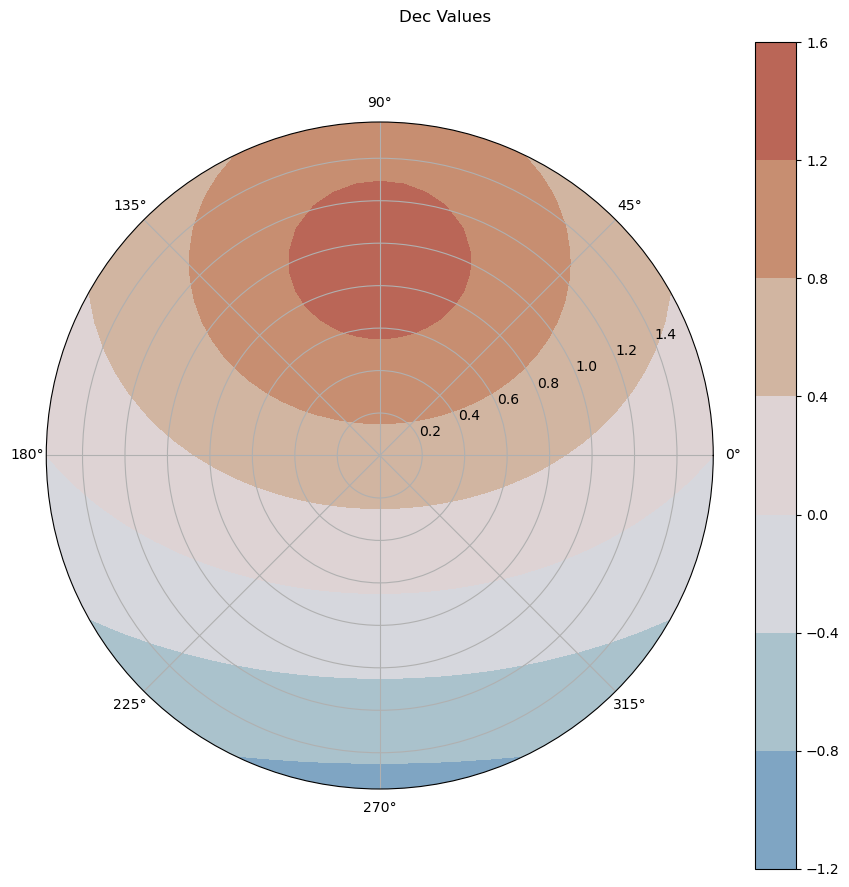

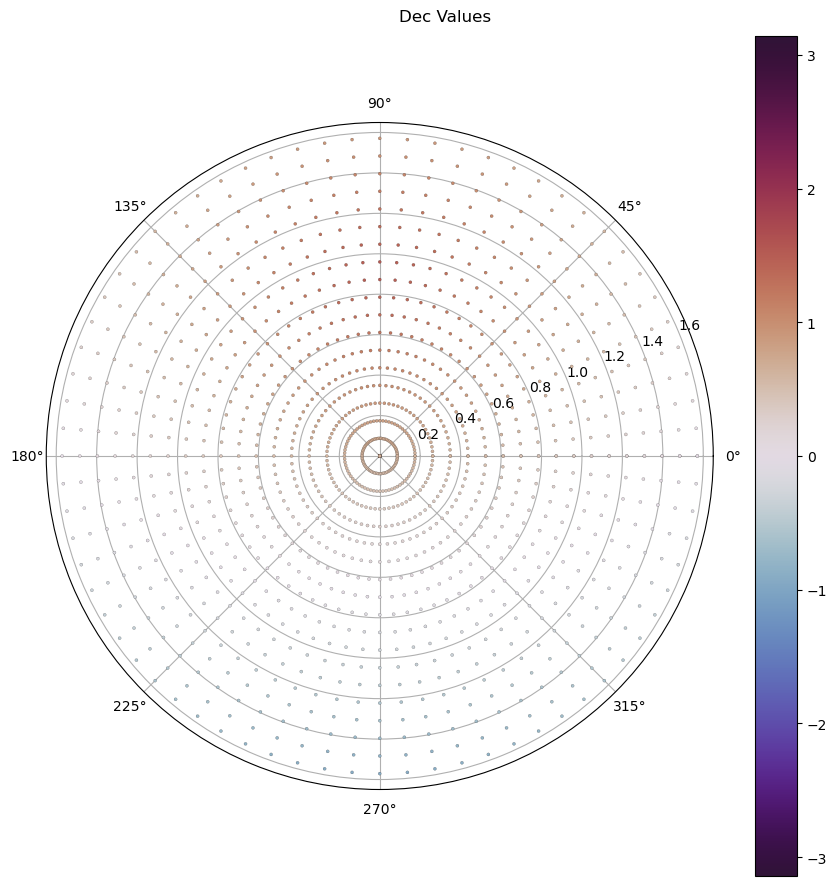

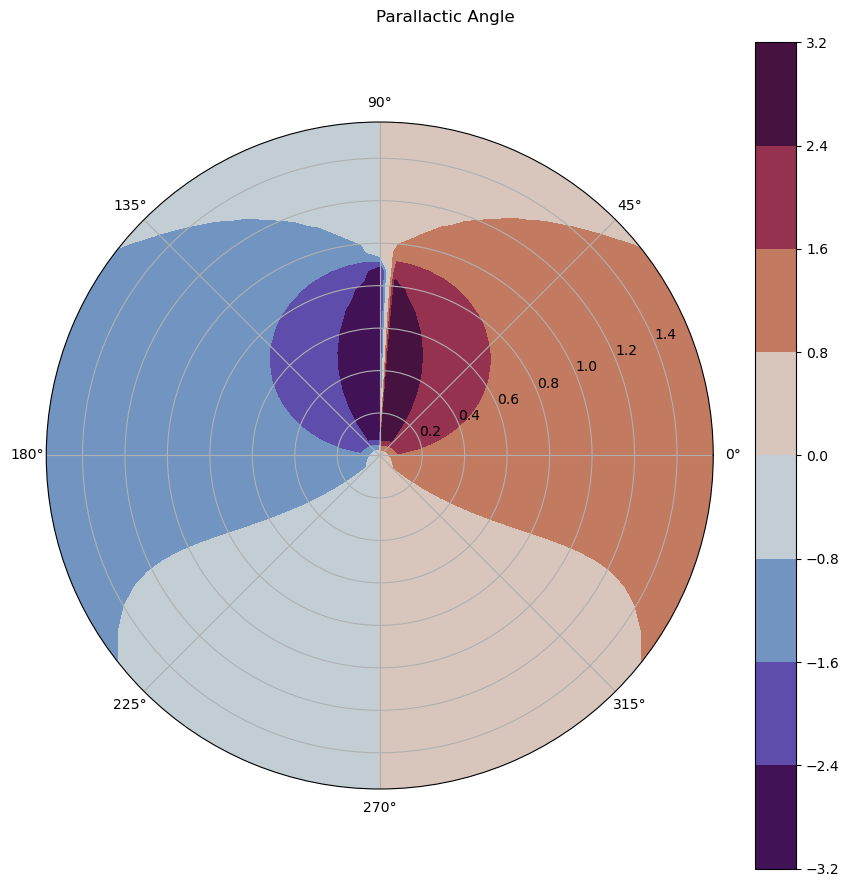

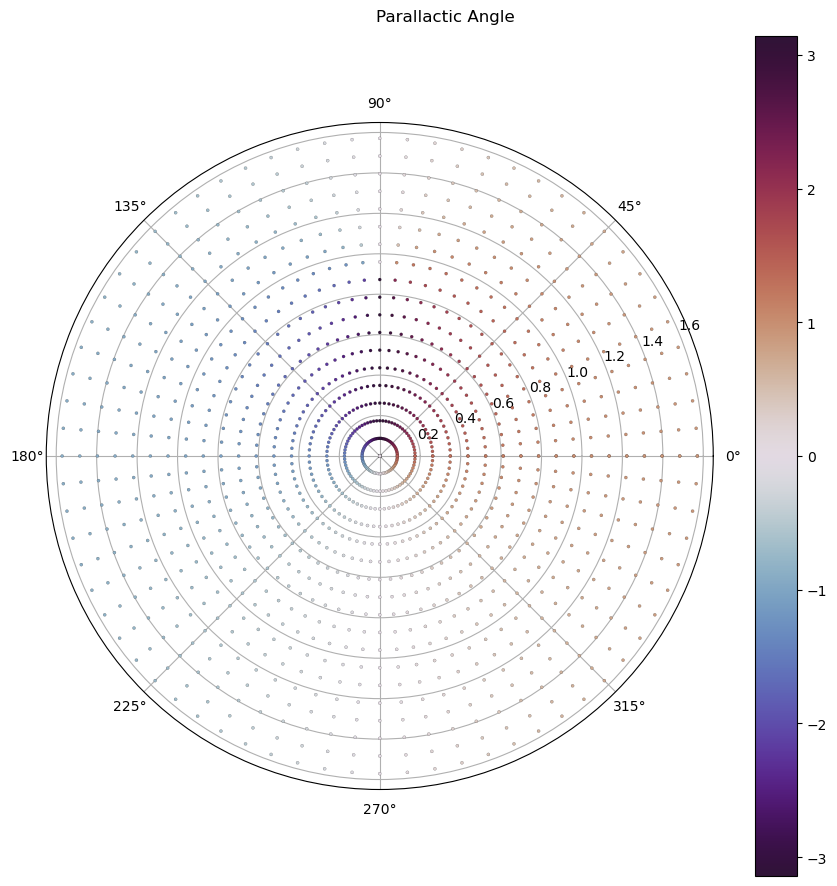

In [3]:
# Calculate coordinate transformation parameters
za_vals, az_vals = np.meshgrid(beam.axis2_array, beam.axis1_array)
ra_vals, dec_vals, parallactic_angle = jones_to_mueller.get_parallactic_angle(az_vals, za_vals)
jones_to_mueller.simple_polar_plot(
    ra_vals,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=True,
    title="RA Values",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    ra_vals,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=False,
    title="RA Values",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    dec_vals,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=True,
    title="Dec Values",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    dec_vals,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=False,
    title="Dec Values",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    parallactic_angle,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=True,
    title="Parallactic Angle",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    parallactic_angle,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=False,
    title="Parallactic Angle",
    cyclic_colorbar=True,
)

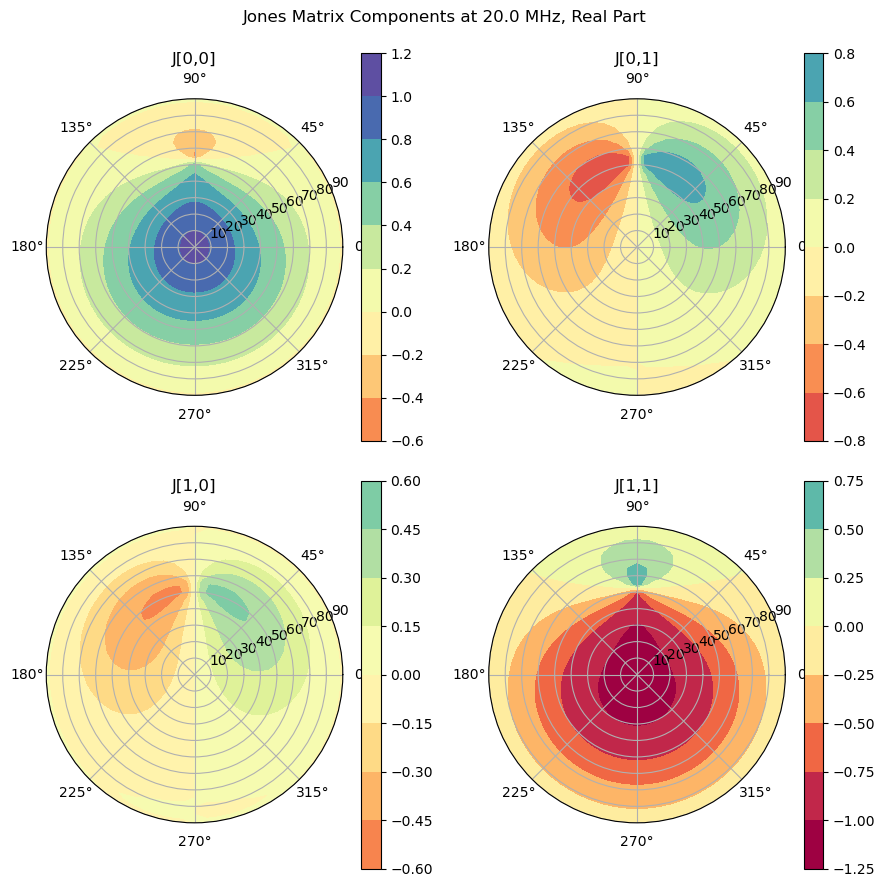

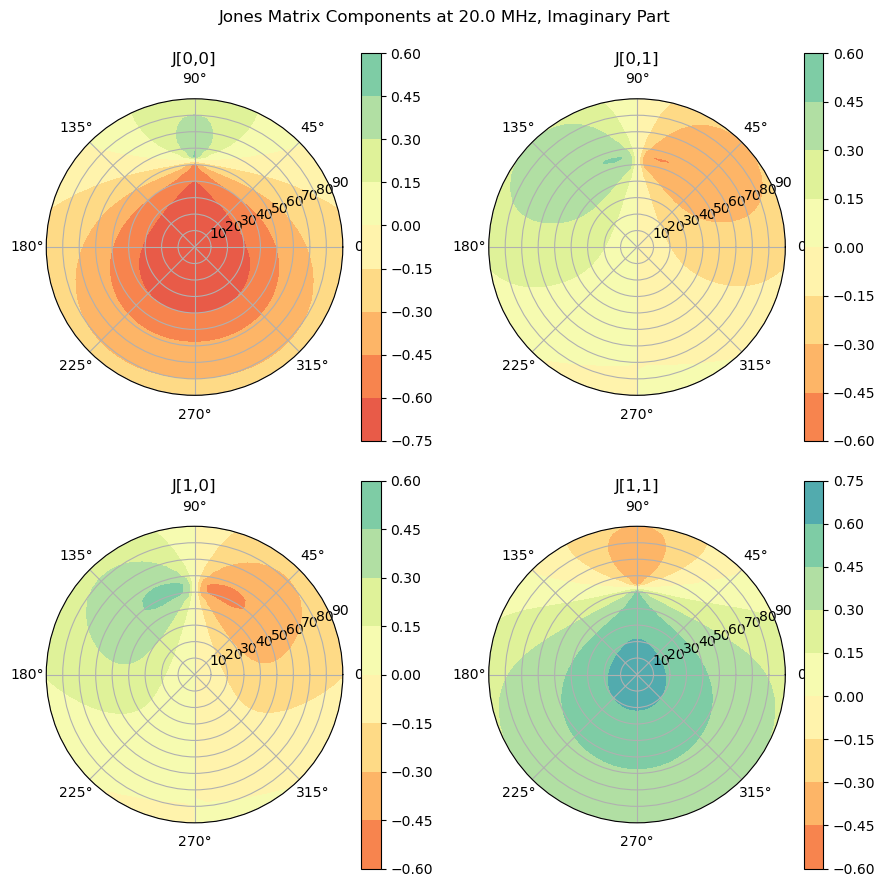

In [4]:
beam_new = jones_to_mueller.pol_basis_transform_azza_to_radec(beam, latitude=37.23, inplace=False)
jones_to_mueller.plot_beam(beam_new, contour_plot=True, plot_freq=20.)
jones_to_mueller.plot_beam(beam_new, contour_plot=True, real_part=False, plot_freq=20.)

In [5]:
mueller_coherency = jones_to_mueller.convert_jones_to_mueller(beam_new)
mueller_stokes = jones_to_mueller.pol_basis_transform_radec_to_stokes(mueller_coherency, inplace=False)

In [6]:
np.shape(mueller_coherency)

(4, 1, 4, 7, 19, 72)

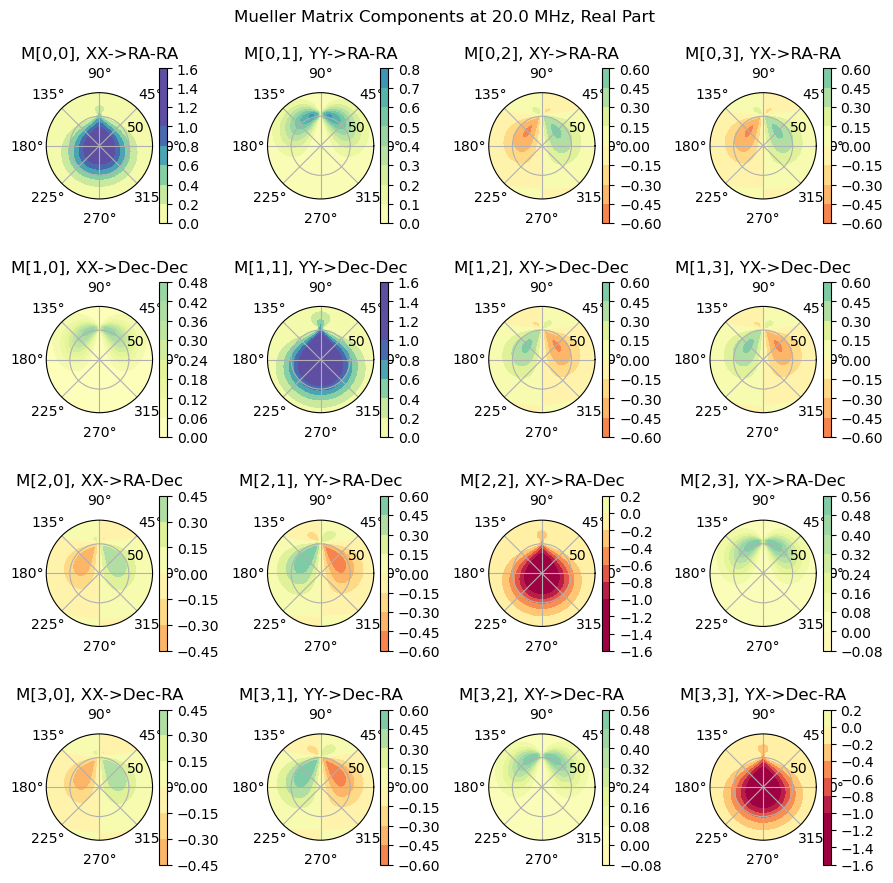

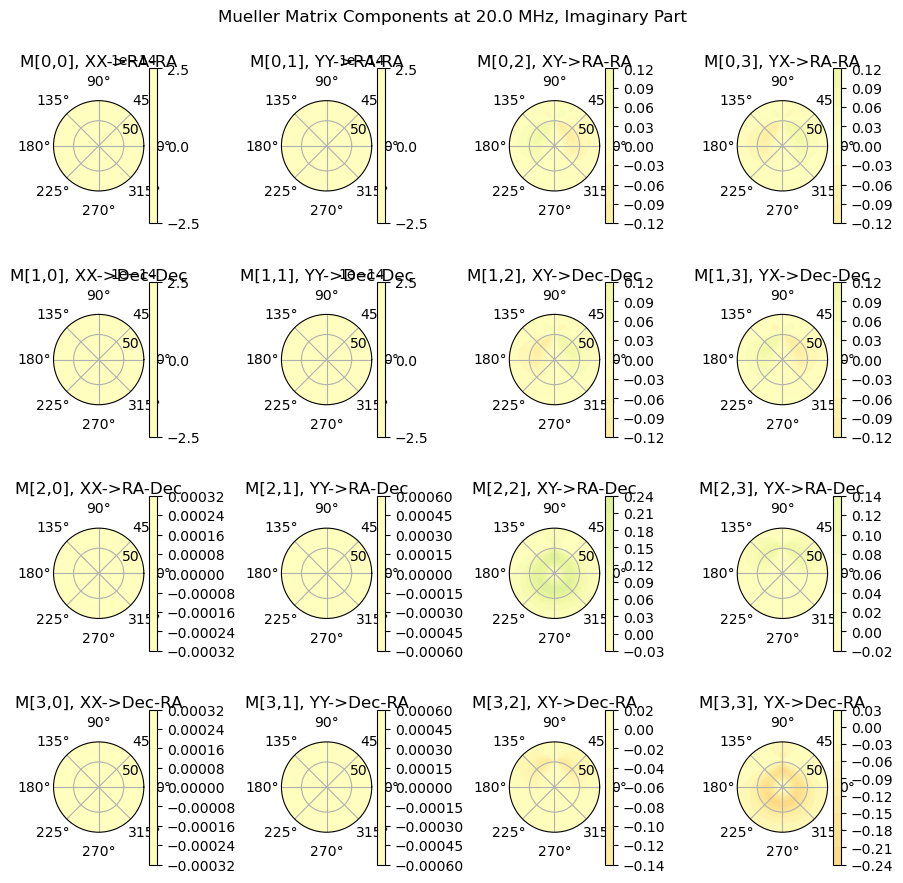

In [7]:
jones_to_mueller.plot_mueller_matrix(
    mueller_coherency,  # pyuvdata beam object
    np.degrees(beam_new.axis1_array),
    np.degrees(beam_new.axis2_array),
    beam_new.freq_array,
    plot_freq=20.0,  # frequency in MHz, must be included in the beam obj
    real_part=True,
    contour_plot=True,
    stokes=False,
)
jones_to_mueller.plot_mueller_matrix(
    mueller_coherency,  # pyuvdata beam object
    np.degrees(beam_new.axis1_array),
    np.degrees(beam_new.axis2_array),
    beam_new.freq_array,
    plot_freq=20.0,  # frequency in MHz, must be included in the beam obj
    real_part=False,
    contour_plot=True,
    stokes=False,
)

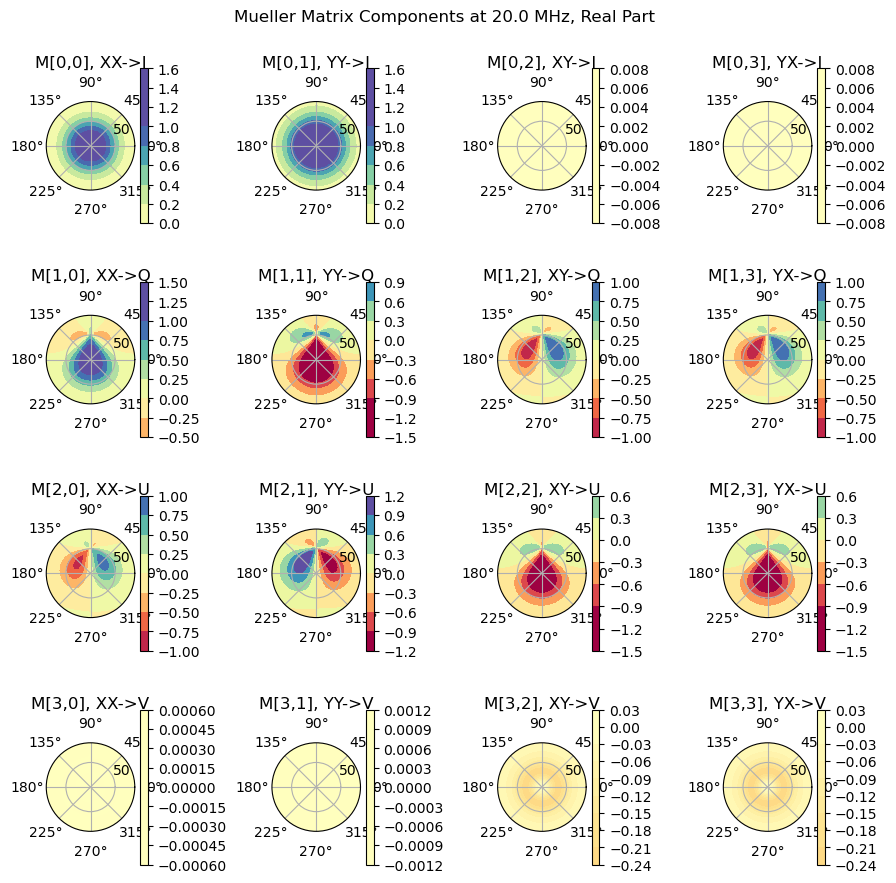

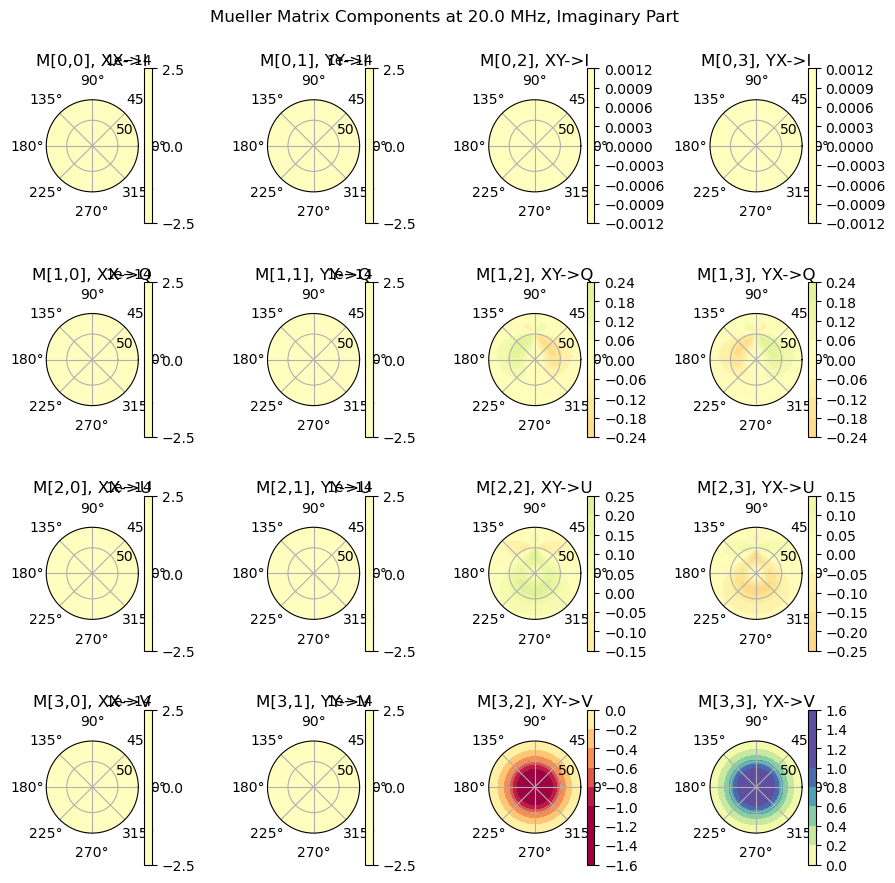

In [8]:
jones_to_mueller.plot_mueller_matrix(
    mueller_stokes,  # pyuvdata beam object
    np.degrees(beam_new.axis1_array),
    np.degrees(beam_new.axis2_array),
    beam_new.freq_array,
    plot_freq=20.0,  # frequency in MHz, must be included in the beam obj
    real_part=True,
    contour_plot=True,
    stokes=True,
)
jones_to_mueller.plot_mueller_matrix(
    mueller_stokes,  # pyuvdata beam object
    np.degrees(beam_new.axis1_array),
    np.degrees(beam_new.axis2_array),
    beam_new.freq_array,
    plot_freq=20.0,  # frequency in MHz, must be included in the beam obj
    real_part=False,
    contour_plot=True,
    stokes=True,
)

In [9]:
jones_to_mueller.write_mueller_to_csv(
    mueller_stokes,
    np.degrees(beam_new.axis1_array),
    np.degrees(beam_new.axis2_array),
    beam_new.freq_array[0,:],
    "/Users/ruby/Astro/LWA_beams/DW_beamquadranttable20151110_mueller.csv",
)

In [26]:
mueller_transposed = np.transpose(mueller_stokes, axes=(1,3,4,5,2,0))
mueller_stokes_inv = np.linalg.inv(mueller_transposed)
mueller_product = np.matmul(mueller_stokes_inv, mueller_transposed)
print(mueller_product[0, 0, 0, 0, :, :])

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


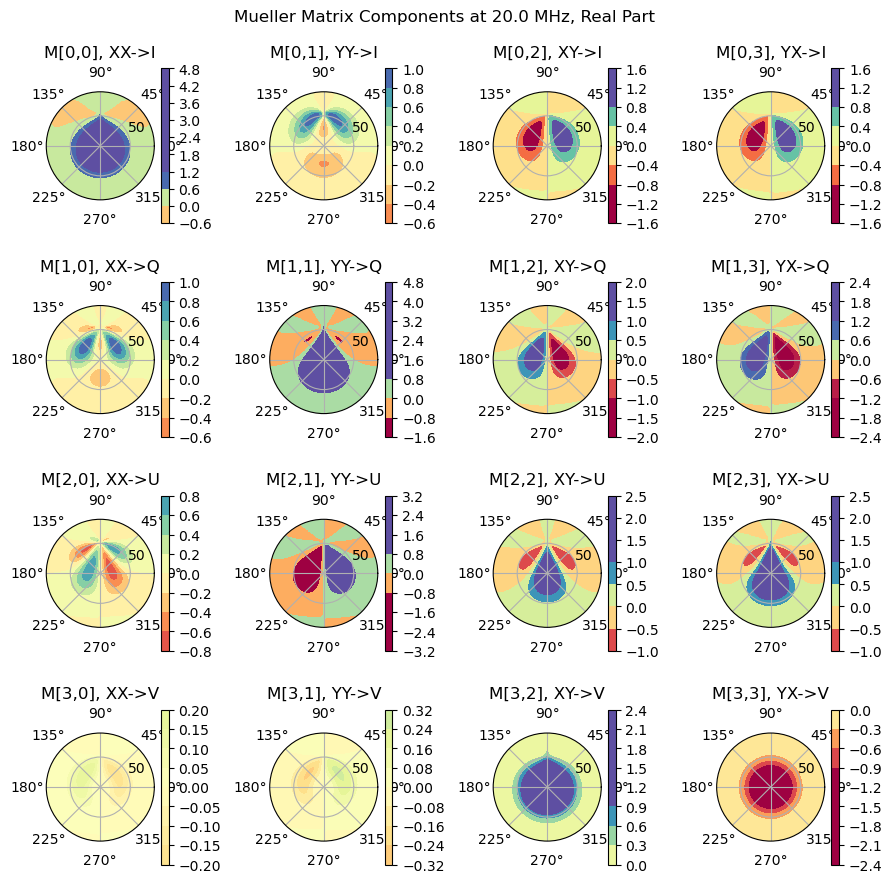

In [12]:
jones_to_mueller.plot_mueller_matrix(
    mueller_product,  # pyuvdata beam object
    np.degrees(beam_new.axis1_array),
    np.degrees(beam_new.axis2_array),
    beam_new.freq_array,
    plot_freq=20.0,  # frequency in MHz, must be included in the beam obj
    real_part=True,
    contour_plot=True,
    stokes=True,
)

In [17]:
inv = np.linalg.inv(mueller_stokes[:,0,:,5,5,5])

In [18]:
print(inv)

[[ 1.77891312e-01-2.60109419e-20j  1.31925157e-01+1.58785405e-18j
   1.19335264e-01-7.93776347e-19j  4.08553951e-04+1.01256208e-19j]
 [ 1.53874036e-01+2.25030128e-20j -1.14039949e-01-1.44019282e-18j
  -1.03299970e-01+7.20096409e-19j -1.10690920e-03-9.00120511e-20j]
 [ 2.36749216e-05-4.08410847e-04j  1.10608963e-01-9.67501989e-03j
  -1.22289335e-01+9.52241150e-03j  1.35522433e-02+1.64889573e-01j]
 [ 2.36749216e-05+4.08410847e-04j  1.10608963e-01+9.67501989e-03j
  -1.22289335e-01-9.52241150e-03j  1.35522433e-02-1.64889573e-01j]]


In [19]:
np.matmul(inv, mueller_stokes[:,0,:,5,5,5])

array([[ 1.00000000e+00+1.73880256e-18j, -6.57098514e-17-2.18138750e-18j,
         7.42814013e-17+2.16840434e-18j,  7.36579851e-17+1.17093835e-17j],
       [-3.95090048e-17-1.57987020e-18j,  1.00000000e+00+1.97468071e-18j,
        -2.08708918e-17-3.03576608e-18j, -2.03287907e-17-3.90312782e-18j],
       [-3.67002435e-17-4.33680869e-19j, -1.68322387e-17+8.23993651e-18j,
         1.00000000e+00-7.03188224e-18j, -5.55111512e-17+2.77555756e-17j],
       [ 1.88651178e-17+4.33680869e-19j, -7.23569425e-17-8.23993651e-18j,
         5.55111512e-17-1.38777878e-17j,  1.00000000e+00+3.56243529e-18j]])

In [16]:
mueller_product[:,0,:,5,5,5].T

array([[14.6682158 -0.01392592j,  4.6883962 +0.32989704j,
        -3.49731606-0.32469343j,  0.51339734-5.62237422j],
       [ 1.3037294 +0.01620622j,  8.15674584-0.38391618j,
        16.2702609 +0.3778605j , -0.457779  +6.54301244j],
       [ 6.58604941+0.57318467j, -9.38430327-7.31676443j,
         0.52546944+7.14885057j,  8.04108362+6.68348596j],
       [ 6.54370543-0.53616222j, -8.38119862+6.43972377j,
        -0.4618128 -6.28564386j, -9.05464325+8.26375575j]])